## RADIATION COMPONENT TEST ##

### This notebook was written entirely by Erkan Istanbulluoglu, head of the Watershed Dynamics Research Group. ###

This notebook illustrates the use of the Radiation component of Landlab. The component outputs:

* A radiation factors, ratio of sloped surface radiation to flat radiation

* Extraterrestrial radiation

* Clear-sky Radiation

* Incoming and Net Shortwave Radiation

* Longwave Radiation

* Net Radiation

To run this model the minimum input requirements are: A digital elevation model; Daily Minimum and maximum air temperatures (Tmin and Tmax). Currently temperature is average at the catchment. Distributed values can be used by modifying the component. Distributed temeperature fields can also be entered as a Landlab Field and used to scale Extraterrestrial radiation to create a field of incoming short-wave radiation. Please see the references cited in the component. 

**Examples**

The first example below uses the component on a DEM

The second example tests the model using a limited data set of observed incoming shortwave radiation from Bondville, IL.



In [1]:
import numpy as np

from landlab.components import Radiation  # we will need to make this import from Landlab in the final version

from landlab import RasterModelGrid

from landlab.io import read_esri_ascii
from landlab.plot import imshow_grid

import matplotlib.pyplot as plt

plt.show()

In [2]:
(watershed,z)=read_esri_ascii('final_nf_90m.asc', name='topographic__elevation')

watershed.set_nodata_nodes_to_closed(z, -9999.) # here we set nodata to closed boundary

watershed.set_watershed_boundary_condition('topographic__elevation') # finds the outlet and closes the watershed boundaries



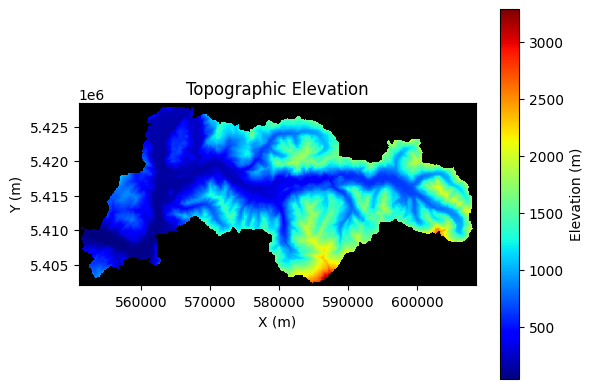

In [3]:
imshow_grid(watershed,'topographic__elevation', plot_name = 'Topographic Elevation', 
            var_name = 'Elevation', var_units = 'm', grid_units = ('m','m'), 
            cmap = 'jet')

In [4]:
# Instantiate the component, each parameter can also be entered separately as seen below
rad = Radiation(watershed, method='Grid', latitude=30, albedo=0.12)
rad._current_time=0.25
rad._Tmin = 15
rad._Tmax = 25

In [5]:
rad.update()


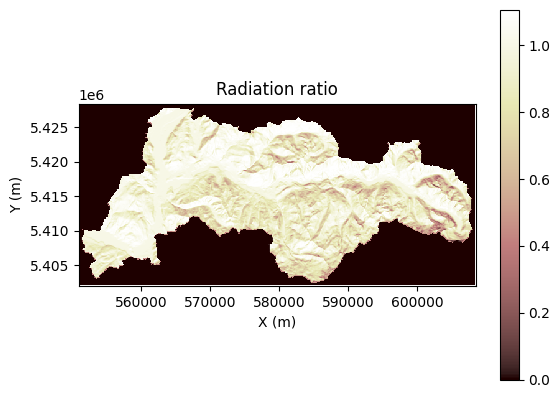

In [6]:
imshow_grid(watershed, 'radiation__ratio_to_flat_surface', values_at='cell',
                plot_name='Radiation ratio', grid_units=('m','m'))

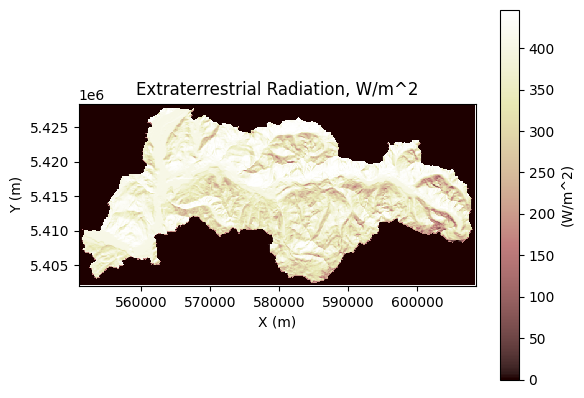

In [7]:
imshow_grid(watershed, 'radiation__extraterrestrial_flux', values_at='cell',
                plot_name='Extraterrestrial Radiation, W/m^2', var_units='W/m^2', grid_units=('m','m'))

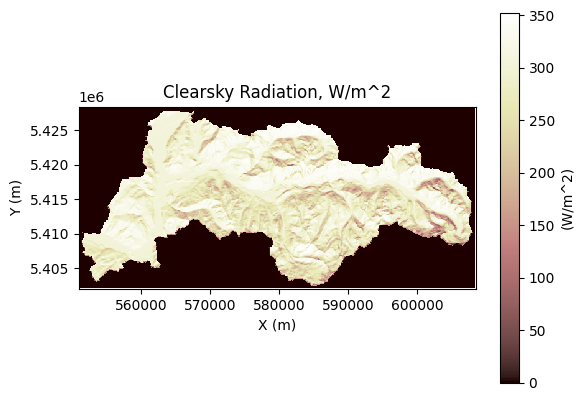

In [8]:
imshow_grid(watershed, 'radiation__clearsky_flux', values_at='cell',
                plot_name='Clearsky Radiation, W/m^2', var_units='W/m^2', grid_units=('m','m'))

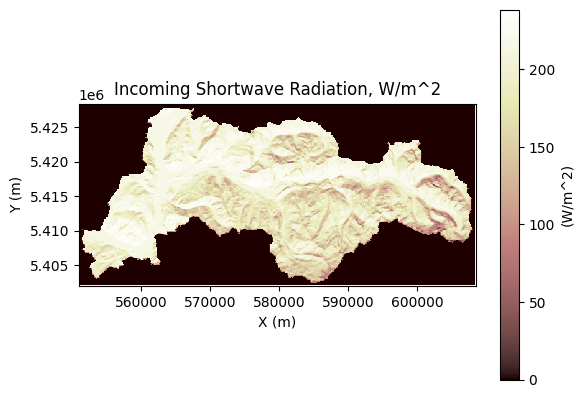

In [9]:
imshow_grid(watershed, 'radiation__incoming_shortwave_flux', values_at='cell',
                plot_name='Incoming Shortwave Radiation, W/m^2', var_units='W/m^2', grid_units=('m','m'))

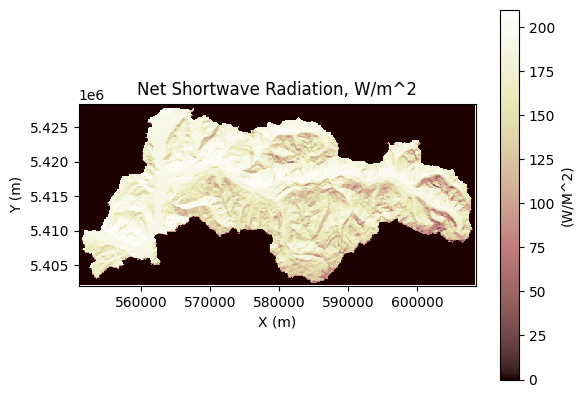

In [10]:
imshow_grid(watershed, 'radiation__net_shortwave_flux', values_at='cell',
                plot_name='Net Shortwave Radiation, W/m^2', var_units='W/M^2', grid_units=('m','m'))

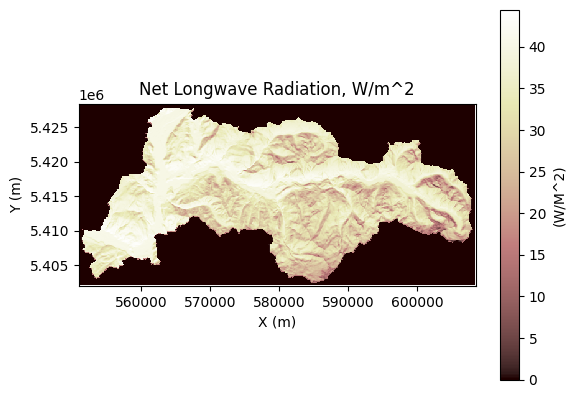

In [11]:
imshow_grid(watershed, 'radiation__net_longwave_flux', values_at='cell',
                plot_name='Net Longwave Radiation, W/m^2', var_units='W/M^2', grid_units=('m','m'))

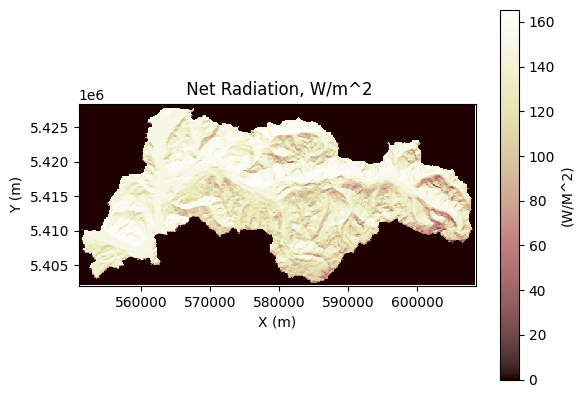

In [12]:
imshow_grid(watershed, 'radiation__net_flux', values_at='cell',
                plot_name=' Net Radiation, W/m^2', var_units='W/M^2', grid_units=('m','m'))

## Clear all before the next task ##

## TEST AGAINST BONDVILLE, IL DATA ##

In this test we used a small flat domain and assigned the elevation of the Bondville, IL weather station. An option given below to run this test on the DEM as well to see how topography impacts the results. 

In [13]:
import numpy as np


from landlab import RasterModelGrid

from landlab.io import read_esri_ascii

from landlab.plot import imshow_grid

import matplotlib.pyplot as plt

plt.show()

**Option 1: use a flat domain of 300 m elevation, consistent with Bondville***

In [14]:
watershed=RasterModelGrid((4,5),5.0)  
z=300*np.ones(watershed.number_of_nodes) # an array of a random field of elevations same size of the grid 
z=np.round([z],1)                         # round up the numbers so that they look simpler
_=watershed.add_field('node','topographic__elevation',z)       # elevation added to nodes
#imshow_grid(watershed,'topographic__elevation')

**Option 2: use the Hugo catchment in Bondville**

In [15]:
#(watershed,z)=read_esri_ascii('Hugo_ws_10m.asc', name='topographic__elevation')

In [16]:
Times=[0.003, 0.005, 0.088, 0.090, 0.167, 0.170, 0.249, 0.252, 0.331, 0.334, 0.416, 0.419, 0.501, 0.504, 0.583, 0.586, 0.671, 0.674, 0.750, 0.753, 0.835, 0.838, 0.876, 0.879, 0.468, 0.471, 0.619, 0.621, 0.704, 0.706, 0.789, 0.791, 0.359, 0.361, 0.211, 0.214]

Tmax=[1.65, -2.11, 2.3, 4.77, 0.34, 1.4, 26.98, 23.56, 21.38, 17.02, 18.84, 17.45, 30.05, 31.55, 28.61, 25.93, 19.41, 26.23, 15.21, 12.25, 12.15, 21.25, 13.01, 15, 24.16, 27.07, 28.99, 30.04, 21.17, 25.05, 17.7, 14.99, 17.69, 19.95, 20.89, 18.05]

Tmin=[-2.02, -3.11, 0, -0.28, -1.22, -8.38, 10.65, 12.42, 15.73, 8.72, 3.86, 9.01, 18.61, 19.37, 19.73, 18.57, 16.18, 16.52, 1.9, -2.01, 8.07, 11.36, 6.7, 4.74, 9.98, 12.66, 21.35, 20.21, 18.09, 10.28, 3.99, 8.06, 10.29, 10.24, 11.29, 7.14]

Rs_obs=[101.94, 43, 42.1, 69, 31.96, 155.52, 262.33, 262.14, 99.88, 180.22, 259.99, 105.05, 257.74, 307.3, 237.44, 167.4, 56.99, 188.7 , 176.72, 222.43, 47.86, 86.83, 54.96, 48.81, 364.54, 357.92, 231.3, 260.8, 58.74, 249.56, 168.45, 122.25, 79.99, 342.48, 140.16, 74.94]

Rext_ws=[]

Rcs_ws=[]

Rs_ws=[]



In [17]:
rad = Radiation(watershed, method='Grid', latitude=40.0667, albedo=0.12)

In [18]:
for i in range(len(Times)): 
    
    
    rad._current_time=Times[i]
    rad._Tmin = Tmin[i]
    rad._Tmax = Tmax[i]
    
    rad.update()
    
    Rext=np.mean(watershed.at_cell['radiation__extraterrestrial_flux'])
    Rcs=np.mean(watershed.at_cell['radiation__clearsky_flux'])
    Rs=np.mean(watershed.at_cell['radiation__incoming_shortwave_flux'])
    
    
    Rext_ws.append(Rext)
    Rcs_ws.append(Rcs)
    Rs_ws.append(Rs)

Text(0, 0.5, 'Observed shorwave radiation (W/m2)')

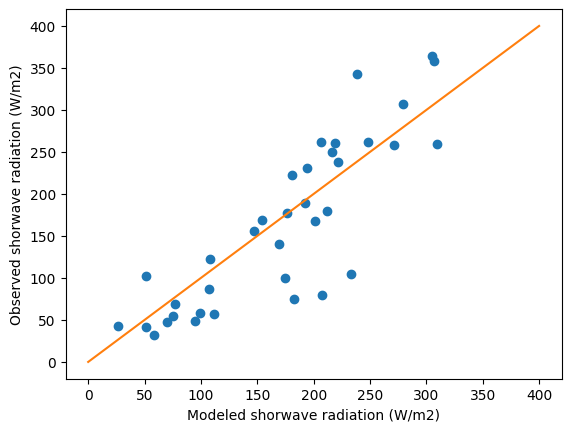

In [19]:
x=[0,400]

plt.plot(Rs_ws, Rs_obs,'o')
plt.plot(x,x)
plt.xlabel('Modeled shorwave radiation (W/m2)')
plt.ylabel('Observed shorwave radiation (W/m2)')


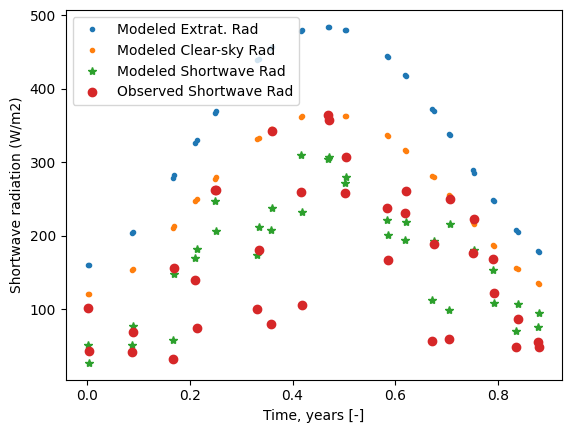

In [20]:
plt.plot(Times, Rext_ws, '.')
plt.plot(Times, Rcs_ws, '.')
plt.plot(Times, Rs_ws, '*')
plt.plot(Times, Rs_obs,'o')

plt.xlabel('Time, years [-]')
plt.ylabel('Shortwave radiation (W/m2)')
plt.legend(['Modeled Extrat. Rad','Modeled Clear-sky Rad', 'Modeled Shortwave Rad','Observed Shortwave Rad'])
